# Two-Coin EM Example

We observe outcomes from 5 independent sequences of 10 coin tosses each. For each sequence, an **unobserved** choice is made between two biased coins, A and B, and then that chosen coin is tossed 10 times. We see the tosses but not which coin generated each sequence.

**Data (5 sequences):**

$X_1=`HTTTHHTHTH`=5\\
X_2=`HHHHTHHHHH`=9\\
X_3=`HTHTTTHHTT`=8\\
X_4=`HTHTTTHHTT`=4\\
X_5=`THHHTHHHTH`=7$

## Model

- Latent variable for sequence $i$:  
  $Z_i \in \{A, B\}$ indicating which coin was used.
- Parameters:
  - Coin usage frequency: $\pi = P(Z_i = A)$ so $1-\pi = P(Z_i = B) = 0.5$.
  - Coin frequencies of heads: $\theta_A = P(H \mid Z=A)$, $\theta_B = P(H \mid Z=B)$.

For sequence $i$, $X_i$ be the number of heads and $10-X_i$ the number of tails (e.g., count H/T in the string).

The (complete-data) likelihood for one sequence is:


$P(X_i| Z_i=A) = \theta_A^{X_i} (1-\theta_A)^{10-X_i},\\
P(X_i| Z_i=B) = \theta_B^{X_i} (1-\theta_B)^{10-X_i}.$

## EM Algorithm

**Initialize** $ \theta_A^{(0)}, \theta_B^{(0)}$ (e.g. $\theta_A^{(0)}=0.6, \theta_B^{(0)}=0.5$).

### E-step (compute responsibilities)

For each sequence $i$, compute the posterior probability that coin A (or B) generated it:

$q(Z_i=A)=P(Z_i=A \mid X_i, \theta_A^{(n)}, \theta_B^{(n)})
= \frac{P(X_i|Z_i=A, \theta_A^{(n)}, \theta_B^{(n)})P(Z_i=A|\theta_A^{(n)}, \theta_B^{(n)})}
{\sum_zP(X_i|Z_i=z, \theta_A^{(n)}, \theta_B^{(n)})P(Z_i=z|\theta_A^{(n)}, \theta_B^{(n)})}
= \frac{(\theta_A^{(n)})^{X_i} (1-\theta_A^{(n)})^{10-X_i}\times 0.5}
{(\theta_A^{(n)})^{X_i} (1-\theta_A^{(n)})^{10-X_i}\times 0.5+(\theta_B^{(n)})^{X_i} (1-\theta_B^{(n)})^{10-X_i}\times 0.5}.$

Then $1-P(Z_i=A \mid X_i, \theta_A^{(t)}, \theta_B^{(t)})= P(Z_i=B  \mid X_i, \theta_A^{(t)})$.

### M-step (maximize expected complete-data log-likelihood)

Update parameters using weighted counts (weights = responsibilities):


$\theta_A^{(t+1)} =
\frac{\sum_{i=1}^N q(Z_i=A)^{(n)} X_i}
{\sum_{i=1}^N q(Z_i=A)^{(n)} (10)}, \quad
\theta_B^{(t+1)} =
\frac{\sum_{i=1}^N (1-q(Z_i=A)^{(n)}) X_i}
{\sum_{i=1}^N (1-q(Z_i=A)^{(n)}) (10)}.$

**Iterate** E-step and M-step until convergence of the log-likelihood or parameters.

## Applying to the Given Data

1. **Count heads/tails** for each sequence to get $(X_i, T_i)$ heads and 10 heads or tails.  
2. **Run EM** using the formulas above:  
   - E-step: compute $q(Z_i=A)^{(n)}$ for all 5 sequences.  
   - M-step: update $\theta_A, \theta_B$.  
3. **Repeat** until parameter changes are negligible (e.g., $<10^{-4}$).

## Notes

- EM is guaranteed to **not decrease** the data log-likelihood each iteration.  
- Different initializations can converge to slightly different local optima—try a few starts to check stability.



 - What are Z , X and θ  ?
 - What is P(X|Z,θ)
 - What is P(Z|X,θ)  ?
 - What is P(Z|θ)  ?


In [7]:
EMcoinStep<-function(theta,data){
  lik <- cbind(#likelihood of data assuming
    dbinom(data,10,theta[1]), #coin A
    dbinom(data,10,theta[2]) #coin B
  )
  ##probabilty of coin given data
  wA<-lik[,1]*0.5 / (lik[,1]*0.5 + lik[,2]*0.5)
  wB<-lik[,2]*0.5 / (lik[,1]*0.5 + lik[,2]*0.5)
  newTheta <-c(#n+1 - parameter
    sum(data*wA)/sum(data*wA + (10-data)*wA),
    sum(data*wB)/sum(data*wB + (10-data)*wB)
  )
  return(newTheta)
}

data <- c(5,9,8,4,7)

theta <- c(0.6,0.5)
for(i in 1:100)
  print(theta<-EMcoinStep(theta,data))


[1] 0.7130122 0.5813393
[1] 0.7452920 0.5692558
[1] 0.7680988 0.5495359
[1] 0.7831646 0.5346175
[1] 0.7910552 0.5262812
[1] 0.7945325 0.5223904
[1] 0.7959287 0.5207299
[1] 0.7964656 0.5200472
[1] 0.7966683 0.5197704
[1] 0.7967441 0.5196587
[1] 0.7967724 0.5196136
[1] 0.7967829 0.5195954
[1] 0.7967868 0.5195881
[1] 0.7967882 0.5195851
[1] 0.7967888 0.5195839
[1] 0.7967890 0.5195835
[1] 0.7967890 0.5195833
[1] 0.7967891 0.5195832
[1] 0.7967891 0.5195831
[1] 0.7967891 0.5195831
[1] 0.7967891 0.5195831
[1] 0.7967891 0.5195831
[1] 0.7967891 0.5195831
[1] 0.7967891 0.5195831
[1] 0.7967891 0.5195831
[1] 0.7967891 0.5195831
[1] 0.7967891 0.5195831
[1] 0.7967891 0.5195831
[1] 0.7967891 0.5195831
[1] 0.7967891 0.5195831
[1] 0.7967891 0.5195831
[1] 0.7967891 0.5195831
[1] 0.7967891 0.5195831
[1] 0.7967891 0.5195831
[1] 0.7967891 0.5195831
[1] 0.7967891 0.5195831
[1] 0.7967891 0.5195831
[1] 0.7967891 0.5195831
[1] 0.7967891 0.5195831
[1] 0.7967891 0.5195831
[1] 0.7967891 0.5195831
[1] 0.7967891 0.


try to run the algorithm in R
 - do you get the same results as in the review?
 - what is lik
 - where is P(z|θ) in the R code
 - what is wA and wB
 - what is sum(data*wA)
 - what is sum(data*wA + (10-data)*wA)


In the experiment their is an assumption that each coin will be used with equal probability. Lets try to remove this assumption and instead estimate the probability of using coin A and coin B

 - try to calculate the expected number of coin A and B tosses from the figure in the article.
try to modify the above code to also estimate the probability of using coin A and B.
 - how many additional parameters needs to be estimated?
 - implement the new model


### Bonus 1 - write the likelihood

 - try to write the formula for the likelihood you are maximizing


### Bonus 2 - What if we don't know the coin probability
instead of assuming the coin probability is 0.5 we can estimate it from the data

In [68]:
EMcoinStep2<-function(theta,data){
  pA <- theta[3]
  pB <- 1-pA
  lik <- cbind(#likelihood of data assuming
    dbinom(data,10,theta[1]), #coin A
    dbinom(data,10,theta[2]) #coin B
  )
  ##probabilty of coin given data
  wA<-lik[,1]*pA / (lik[,1]*pA + lik[,2]*pB)
  wB<-lik[,2]*pB / (lik[,1]*pA + lik[,2]*pB)
  newTheta <-c(#n+1 - parameter
    sum(data*wA)/sum(data*wA + (10-data)*wA),
    sum(data*wB)/sum(data*wB + (10-data)*wB),
    sum(wA)/length(data)
  )
  return(newTheta)
}

data <- c(5,9,8,4,7)
## theta is the freq_A, freq_B, p(coin=A)
theta <- c(0.6,0.5,0.9)
for(i in 1:100)
  print(theta<-EMcoinStep2(theta,data))

[1] 0.6707462 0.5402588 0.9176460
[1] 0.6751086 0.5095828 0.9087236
[1] 0.6801503 0.4869569 0.8956987
[1] 0.6855878 0.4741115 0.8790039
[1] 0.6914203 0.4683561 0.8591423
[1] 0.6978318 0.4665712 0.8364105
[1] 0.7049935 0.4668314 0.8110804
[1] 0.7129728 0.4682066 0.7835779
[1] 0.7217012 0.4702957 0.7545748
[1] 0.7309581 0.4729259 0.7250029
[1] 0.7403764 0.4759995 0.6959779
[1] 0.7494927 0.4794226 0.6686316
[1] 0.7578467 0.4830762 0.6438966
[1] 0.7650986 0.4868139 0.6223342
[1] 0.7711018 0.4904787 0.6040889
[1] 0.7758960 0.4939293 0.5889728
[1] 0.7796397 0.4970636 0.5766108
[1] 0.7825337 0.4998276 0.5665687
[1] 0.7847686 0.5022103 0.5584324
[1] 0.7865026 0.5042307 0.5518413
[1] 0.7878578 0.5059244 0.5464965
[1] 0.7889252 0.5073333 0.5421558
[1] 0.7897724 0.5084996 0.5386246
[1] 0.7904490 0.5094619 0.5357473
[1] 0.7909924 0.5102545 0.5333996
[1] 0.7914308 0.5109066 0.5314814
[1] 0.7917858 0.5114427 0.5299125
[1] 0.7920740 0.5118833 0.5286282
[1] 0.7923087 0.5122453 0.5275759
[1] 0.7925000 

# EM algorithm examples

## Estimating allele frequencies from genotype likelihoods
We will try to estimate allele frequencies based on the reads in slides "Simple allele frequency estimator" from 6 individuals. The number of reads supporting allele G and allele T is shown in the table

| indivduals      | 1  | 2  | 3 | 4 | 5 | 6 |
|-------|----|----|---|---|---|---|
| G reads     | 7  | 25 | 5 | 4 | 0 | 0 |
| T reads    | 0  | 1  | 3 | 4 | 2 | 4 |

To simplify we will assume that the seqeuncing error rate is $\epsilon=0.01$ for all reads (Not recommended for real data) and we will use the GATK model to that $\epsilon_{G->T}=\epsilon_{T->G}=0.01/3$. When the error rates are the same for each reads and we only observe to kinds of read then the GATK model simplifies to

\begin{aligned}
g_{GG} &= (1 - \epsilon)^{\#G} \left(\tfrac{\epsilon}{3}\right)^{\#T}, \\
g_{GT} &= \left(\frac{1}{2}(1 - \epsilon) + \frac{1}{2} \tfrac{\epsilon}{3}\right)^{\#G+\#T}, \\
g_{TT} &= (1 - \epsilon)^{\#T} \left(\tfrac{e}{3}\right)^{\#G}.
\end{aligned}


You can read and run the calculatins in R below


In [62]:
e <-0.01
Greads <- c(7,25,5,4,0,0)
Treads <- c(0,1,3,4,2,4)


# Genoetype likelyhoods. Ignore how the genotype likelihoods are calculated here
# genoetype likelihood assuming the error is the same for all reads
# NB!. For real data we have four allele and we cannot calculate it like this because the error rate is different for each read
gGG <- (1-e)^Greads * (e/3)^Treads
gGT <-  ( 0.5*(1-e) + 0.5 * e/3 )^(Treads+Greads)
gTT <- (1-e)^Treads * (e/3)^Greads
GL<-rbind(gGG,gGT,gTT)
colnames(GL) <- paste("ind",1:6)

cat("Genotypes likehooods:\n")
print(GL)

Genotypes likehooods:
           ind 1        ind 2        ind 3        ind 4        ind 5
gGG 9.320653e-01 2.592738e-03 3.522185e-08 1.185921e-10 1.111111e-05
gGT 7.455128e-03 1.252248e-08 3.702714e-03 3.702714e-03 2.466778e-01
gTT 4.572474e-18 1.168433e-62 3.993000e-13 1.185921e-10 9.801000e-01
           ind 6
gGG 1.234568e-10
gGT 6.084993e-02
gTT 9.605960e-01


To estimate the allele frequency we can write up the likelihood as
$$p(X \mid \theta) = \prod_{i=1}^N p(X_i|\theta) = \prod_{i=1}^N\sum_{z}p(X_i|Z_i=z)p(Z_i=z|\theta)$$
 - What is N and i?
 - What are Z, X and $\theta$  ?
 - What is $P(X_i|Z_i=z)$?
 - What is $P(Z_i=z|\theta)$  ?
 - What are we assuming by setting $p(X \mid \theta) = \prod_{i=1}^N p(X_i|\theta)$?



Let try to calculate the likelhoods assuming that the allele frequency is 0.3 or 0.1

In [63]:
calculateLogLike <- function(theta,GL){
   #p(z|θ)
   pZ  <- c(pZ0= (1-theta)^2 ,pZ1= 2*theta*(1-theta), pZ2= theta^2 )
   sum( log( colSums(GL*pZ) ))
}

theta <- 0.3
cat("\n log-likelhoods with theta_T",theta,"\n")
calculateLogLike(theta , GL)

theta <- 0.1
cat("\n log-likelhoods with theta_T",theta,"\n")
calculateLogLike(theta , GL)


 log-likelhoods with theta_T 0.3 


[1] -24.21799


 log-likelhoods with theta_T 0.1 


[1] -27.8713

 - Which frequency fits best with the data?
 - Identify the genotype likelihoods $P(X_i|Z_i=z)$ and the use of HWE $P(Z_i=z|\theta)$ in the code.

Lets plot the likelihood surface

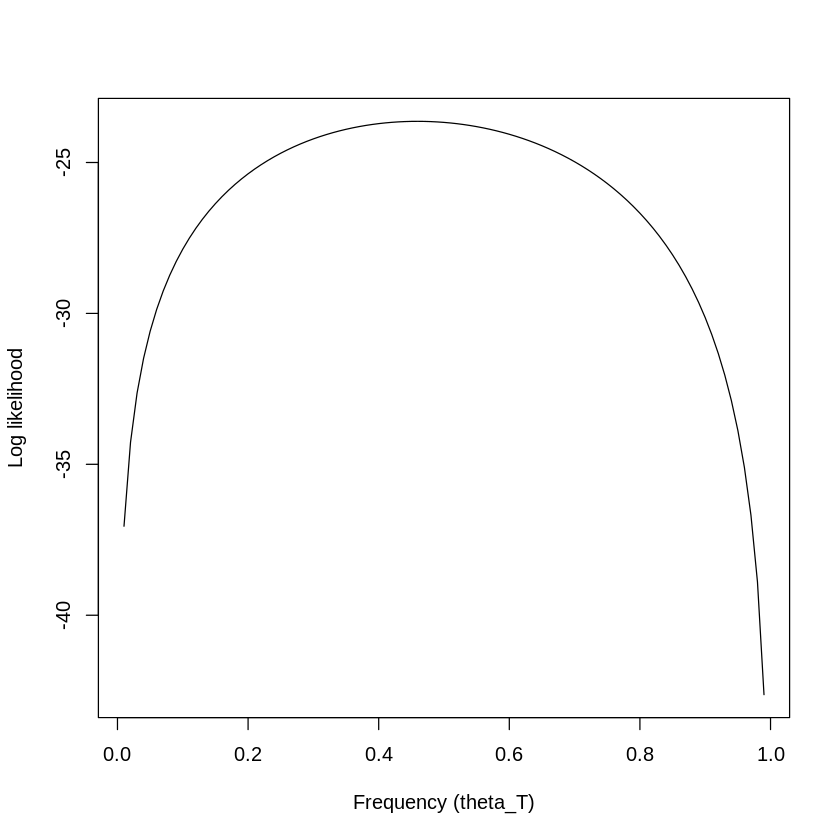

In [65]:
thetas <- 1:99/100
ll <- sapply(
  thetas,
  function(x) calculateLogLike(x,GL)
)
plot(thetas,ll,ylab="Log likelihood",xlab="Frequency (theta_T)",type="l")

To find the maximum we use a EM algorithm which has two steps

E-step:
   $q_i(Z_j)=p(Z_j|X_i,\theta^{n})$
   

M-step:
     $\theta^{(n+1)} = argmax_{\theta} Q(\theta|\theta^{(n)})$
   
Therefore in each in each iteration of the EM algorith we need to calculate the posterior probabiltiy of the genotype given the frequency. For this we use bayes formula
$$p(Z_i=z|X_i,\theta^{(n)}) =\frac{p(X_i|Z_i=z,\theta^{(n)})p(Z_i=z|\theta^{(n)}) }{\sum_{z'}p(X_i|Z_i=z’,\theta^{(n)})p(Z_i=z’|\theta^{(n)})}$$
which is can simply by
$p(X_i|Z_i=z,\theta^{(n)})=p(X_i|Z_i=z)$
 - Why can we do that?

In the second part we use the posterior probabilities to get the expected number of G and T alleles.

The expected fraction of G alleles is
$$\frac{\sum_i^N 2\times P(Z_i=GG|X_i,\theta^{(n)})+P(Z_i=GT|X_i,\theta^{(n)})}{\sum_z \sum_i^N 2\times P(Z_i=z|X_i,\theta^{(n)})}=\frac{\sum_i^N 2\times P(Z_i=GG|X_i,\theta^{(n)})+P(Z_i=GT|X_i,\theta^{(n)})}{12}$$
 - Explain the 2 and the 12 in the above equations.




 Lets run the EM algorithm

In [38]:

EMgeno<-function(theta,GL){ #numeric optimazition EM
  ## Q(Z), for Z = GG,GT,TT = 0,1,2
  #p(x|z)p(z|θ)
   w0<-GL[1,]*(1-theta)^2
   w1<-GL[2,]*2*theta*(1-theta)
   w2<-GL[3,]*theta^2

  ## p(z|θ,x)
  # p(x|θ)= \sum_z p(x|z)p(z|θ) =
  # p(x|Z=0)p(Z=0|θ)+p(x|Z=1)p(Z=1|θ)+p(x|Z=2)p(Z=2|θ)
   pX <- w0 + w1 + w2
  # p(z|θ,x) = p(x|z) p(z|θ) / p(x|θ)
   p0 <- w0/pX
   p1 <- w1/pX
   p2 <- w2/pX

  ## Î¸^(n+1) = E[allele 1] / ( E[allele 1] + E[allele 2] )
   thetaNew <- sum( p1+2*p2 ) / sum( 2*p0 + 2*p1 + 2*p2 )
   return(thetaNew)
}


maxIter <- 10
output <- matrix(NA,nrow=maxIter+1,ncol=3)
colnames(output)<- c("iter","theta","LL")
#starting point
theta <- c(0.2)

for(i in 0:maxIter){
  #calculate likelihood and print (not used by the EM)
  output[i+1,] <- c(i,theta,calculateLogLike(theta,GL))
  cat("theta=",output[i+1,"theta"],"logLike=",output[i+1,"LL"],"iteration",output[i+1,"iter"],"\n")

  #update theta (the EM steps)
  theta <- EMgeno(theta,GL)
}
output

theta= 0.2 logLike= -25.37513 iteration 0 
theta= 0.4166166 logLike= -23.67559 iteration 1 
theta= 0.4539297 logLike= -23.63715 iteration 2 
theta= 0.4586414 logLike= -23.63655 iteration 3 
theta= 0.4592134 logLike= -23.63654 iteration 4 
theta= 0.4592825 logLike= -23.63654 iteration 5 
theta= 0.4592909 logLike= -23.63654 iteration 6 
theta= 0.4592919 logLike= -23.63654 iteration 7 
theta= 0.459292 logLike= -23.63654 iteration 8 
theta= 0.459292 logLike= -23.63654 iteration 9 
theta= 0.459292 logLike= -23.63654 iteration 10 


iter,theta,LL
0,0.2000000,-25.37513
1,0.4166166,-23.67559
2,0.4539297,-23.63715
3,0.4586414,-23.63655
4,0.4592134,-23.63654
5,0.4592825,-23.63654
6,0.4592909,-23.63654
7,0.4592919,-23.63654
8,0.4592920,-23.63654
9,0.4592920,-23.63654


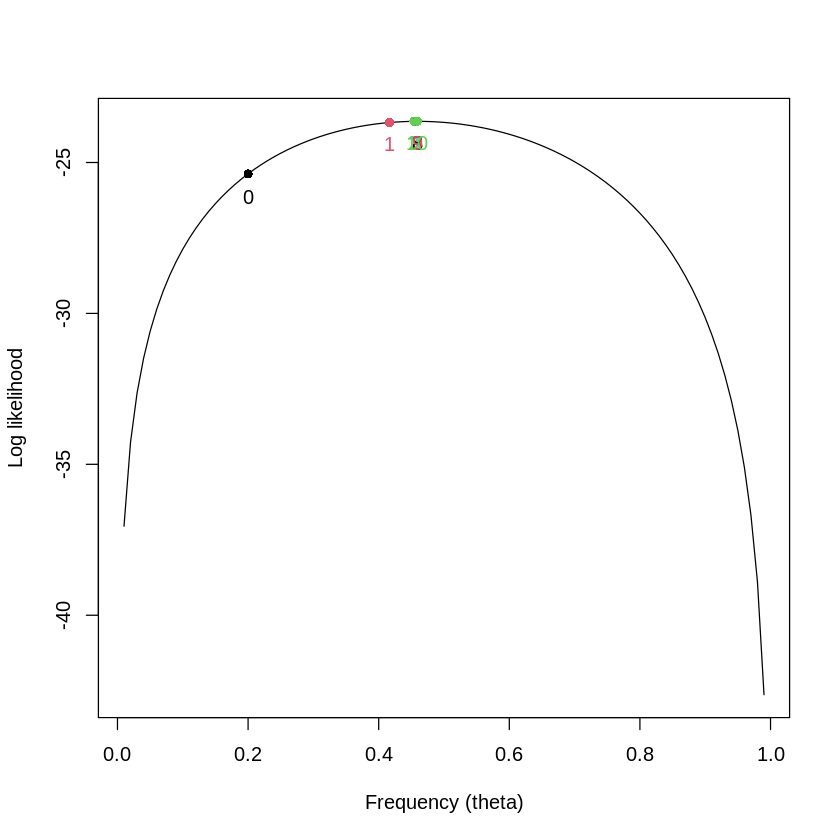

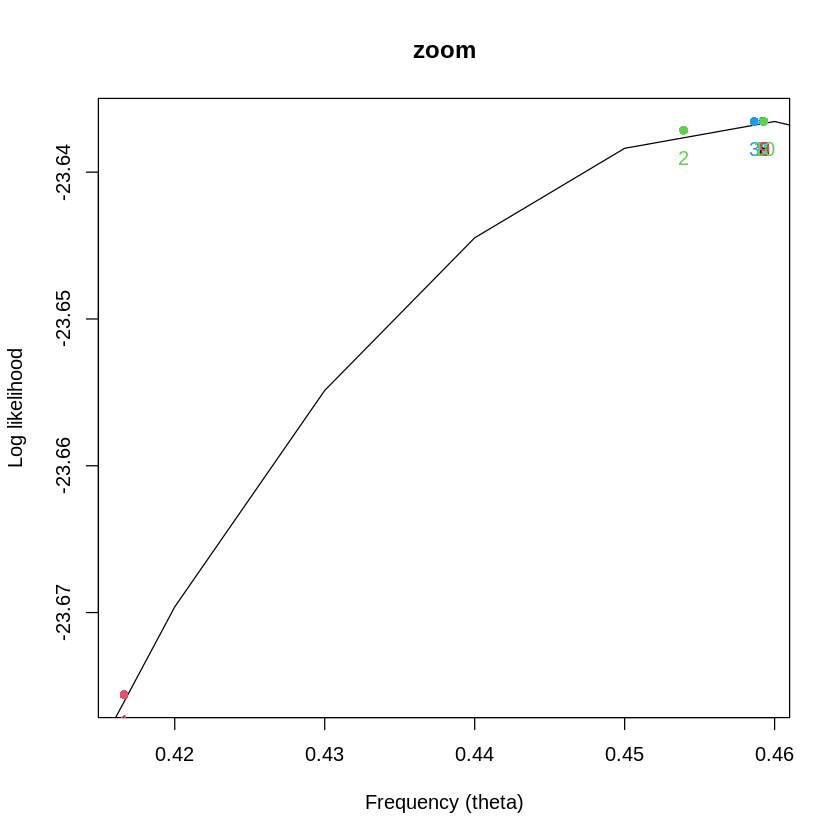

In [60]:
plot(thetas,ll,ylab="Log likelihood",xlab="Frequency (theta)",type="l")
points(output[,"theta"],output[,"LL"],pch=16,col=1:nrow(output))
text(output[,"theta"],output[,"LL"]*1.03,output[,"iter"],col=1:nrow(output))

plot(thetas,ll,ylab="Log likelihood",xlab="Frequency (theta)",type="l",
ylim=range(output[-1,"LL"]),xlim=range(output[-1,"theta"]),main="zoom")

points(output[,"theta"],output[,"LL"],pch=16,col=1:nrow(output))
text(output[,"theta"],output[,"LL"]*1.00008,output[,"iter"],col=1:nrow(output))


#abline(v=theta_save)


 - how many iterations are needed for convergense?
 - try a different starting point the is further away from the maximum likelihood


### Bonus ( if you have extra time)
 - test if the site is polymorphic (hint: calc the likelihoods and use 1-pchisq(x,1) to get a p-value)


# Coin toss - how to find the maximum likelihood for a binomial

Let $X\in \{0,1\}^N$ be the outcome of a series of $N$ coin tosses  (the data) where each 0 corresponds to the outcome tail and each 1 is the outcome of a head. To estimate the frequency ($\theta$) we can write up the likelihood as
$$
\begin{aligned}
P(X|\theta)&=Binom(k=\sum X;p=\theta,n=N)={N\choose k} \prod_{i=1}^N P(X_i|\theta)\\
&={N\choose k} \prod_{i=1}^N \theta^{X_i}(1-\theta)^{1-X_i}∝\prod_{i=1}^N \theta^{X_i}(1-\theta)^{1-X_i}=\prod_{i=1}^N P(X_i|\theta)
\end{aligned}
$$

To find the maximum likelihood we can choose to maximize with or without the binomial coefficient

In [14]:
## simulate 10 coin tosses
theta_true <- 0.5
( X <- rbinom(10,1,theta_true) )

k <- sum(X)

cat("Number of heads",k,"\n")

[1] 0 1 1 0 1 1 0 0 0 0

Number of heads 4 


To find the maximum we can work on any function that is proportional to the probability of the data which is called the likelihood. We can also choose to work on the log-likelihood. As can be seen below they will have the maximum the same place.

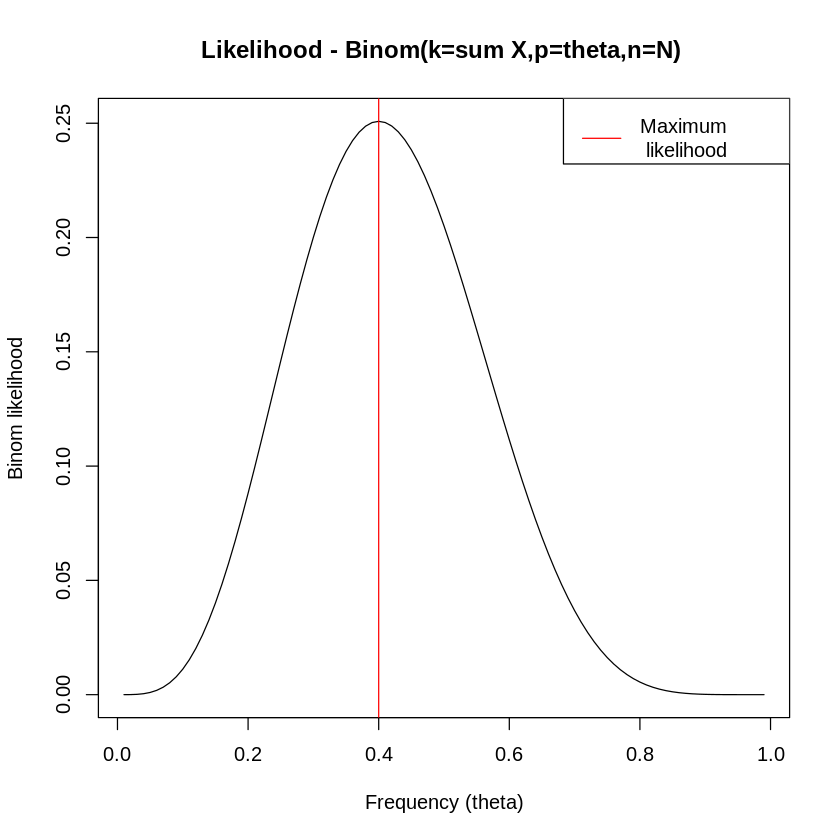

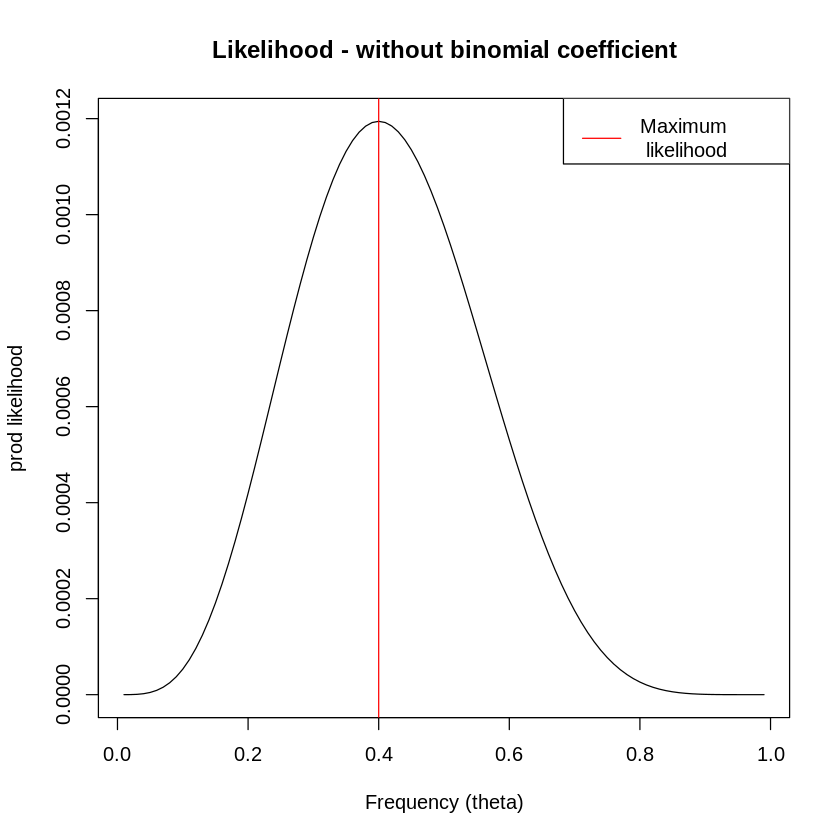

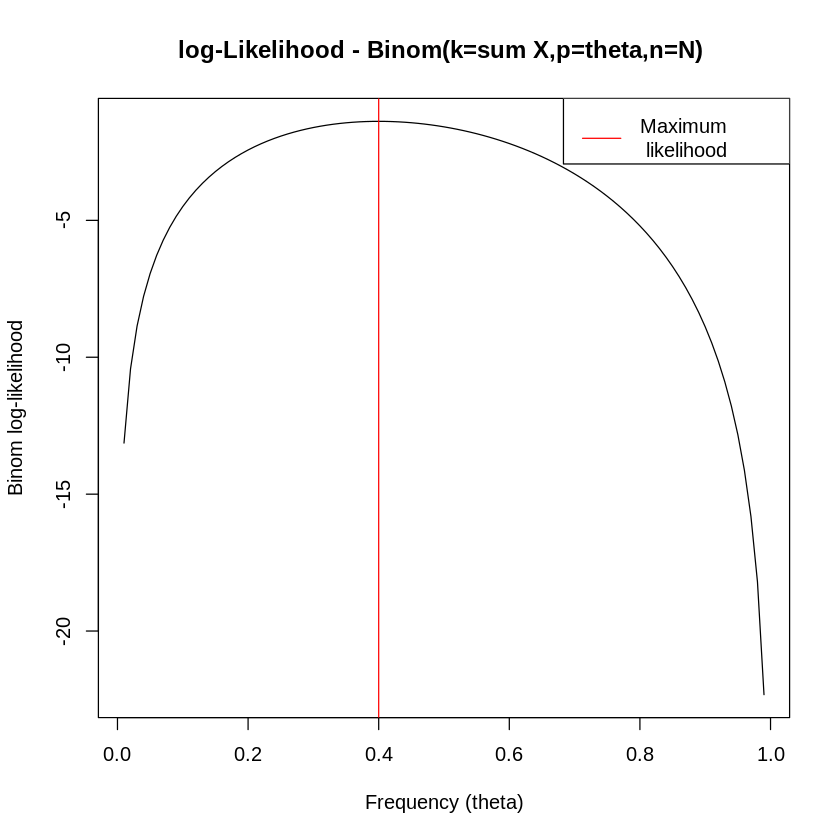

In [18]:
thetas <- 1:99/100

likBinom <- dbinom(k,10,thetas)
plot(thetas,likBinom,ylab="Binom likelihood",xlab="Frequency (theta)",type="l",main="Likelihood - Binom(k=sum X,p=theta,n=N) ")
abline(v=k/10,col="red");legend("topright","Maximum\n likelihood",lty=1,col="red")

likProd <- sapply(thetas, function(x) prod(c(1-x,x)[X+1]) )
plot(thetas,likProd,ylab="prod likelihood",xlab="Frequency (theta)",type="l",main="Likelihood - without binomial coefficient")
abline(v=k/10,col="red");legend("topright","Maximum\n likelihood",lty=1,col="red")

plot(thetas,log(likBinom),ylab="Binom log-likelihood",xlab="Frequency (theta)",type="l",main="log-Likelihood - Binom(k=sum X,p=theta,n=N) ")
abline(v=k/10,col="red");legend("topright","Maximum\n likelihood",lty=1,col="red")


### Analytical solution
$$P(X|\theta)={N\choose k} \prod_{i=1}^N P(X_i|\theta)={N\choose k}\theta^k(1-\theta)^{N-k},$$
where $k=\sum_i X_i$.
The log likelhood is
$$LL(\theta)=log(P(X|\theta))=log{N\choose k} +\sum_{i=1}^N log  \left(P(X_i|\theta)\right)=log{N\choose k}+k\cdot log(\theta) +(N-k)log(1-\theta).$$

To find the maximum we set the derivative to zero

$$\frac{d LL(\theta)}{d \theta}=\frac{k}{\theta}-\frac{N-k}{1-\theta}=0 \quad \Rightarrow \quad \theta=\frac{k}{N}$$
therefore the maximum likelihood solution is
$$\hat{\theta}=argmax_{\theta}{N\choose k}\theta^k(1-\theta)^{N-k}=\frac{k}{N}$$



